In [2]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [35]:
df = pd.read_csv("baseball.csv")
df.shape

(30, 17)

Since the dataset is really small. It would be hard for us to remove any instance. So avoid removing any instance.

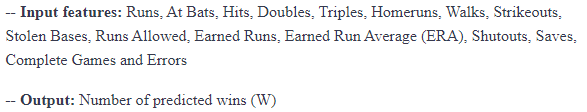

In [36]:
# chaning the column names as given in the problem statement
columns = ["wins", "runs", "at bat", "hit", "double", "triple", "homerun", "walk", "strikeouts", "stolen base","runs allowed",
          "earned runs", "earned run average","complete games", "shutouts","saves", "errors"]
df.columns = columns

In [9]:
df.head()

,wins,runs,at bat,hit,double,triple,homerun,walk,strikeouts,stolen base,runs allowed,earned runs,earned run average,complete games,shutouts,saves,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Since the scale and values of each column is different, the data need to be scaled properly so that the models can converge efficiently.

In [10]:
df.dtypes

wins                    int64
runs                    int64
at bat                  int64
hit                     int64
double                  int64
triple                  int64
homerun                 int64
walk                    int64
strikeouts              int64
stolen base             int64
runs allowed            int64
earned runs             int64
earned run average    float64
complete games          int64
shutouts                int64
saves                   int64
errors                  int64
dtype: object

All the columns are numerical types. No encoding is requried for any of the column. Moreover, there are no missing values in the data.

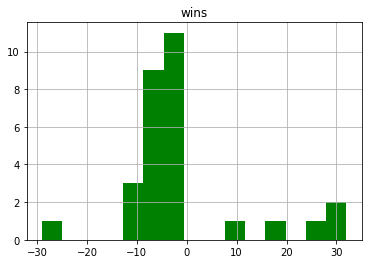

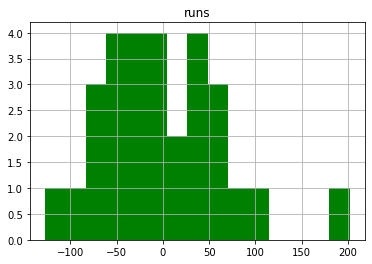

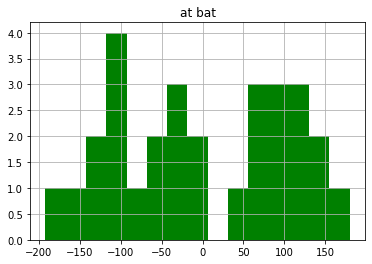

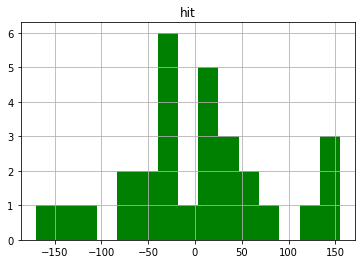

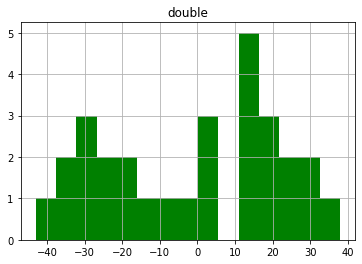

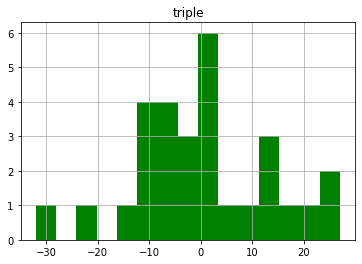

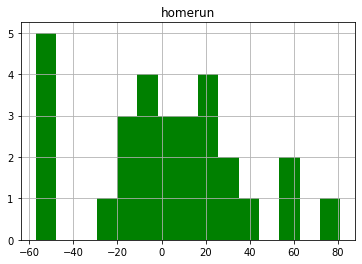

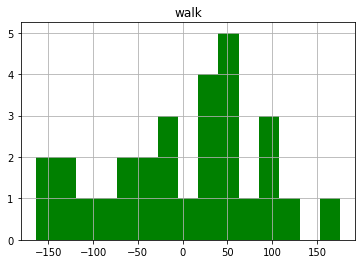

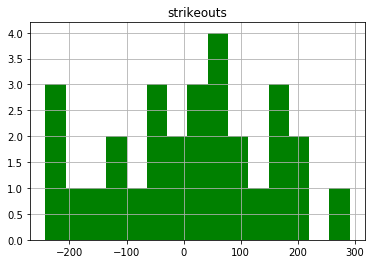

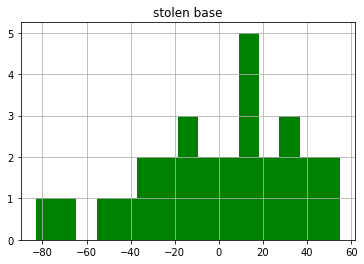

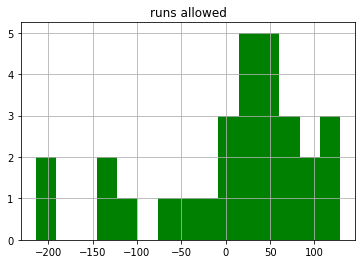

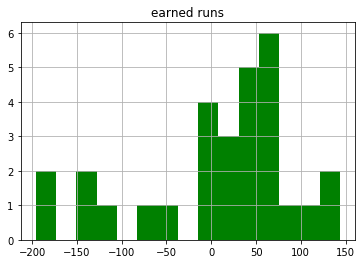

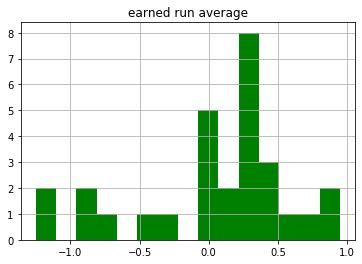

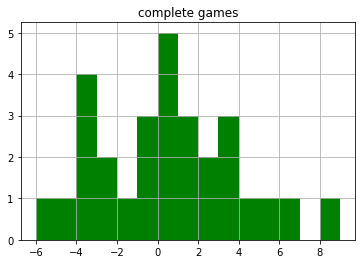

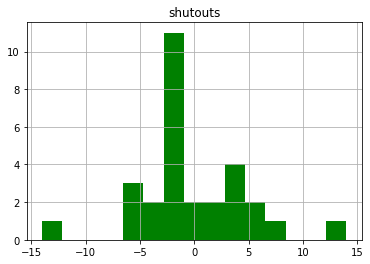

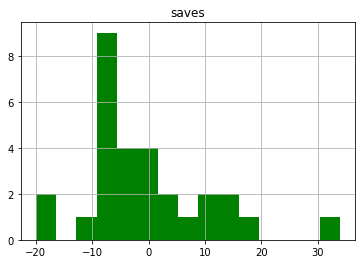

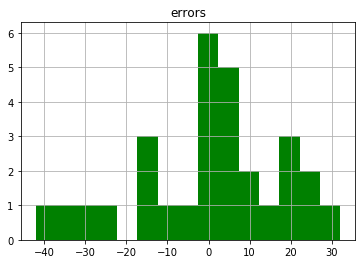

In [16]:
import matplotlib.pyplot as plt
#num_df = df.drop(["Country", "Region"], axis = 1)
#plt.figure()
num_feat = columns
for i in num_feat:
    plt.figure()
    plt.title(i)
    df[i].diff().hist(color='g', alpha=1, bins=15)

Since the number of instances are very small, it hard to analyze the distribution of data. The data of wins, runs, at bat, hit, triple, walk, strikeout, stolen base, runs allowed, earned runs, earned run average, complete games, shutouts, saves, errors has distribution which look like normal distribution.

In [226]:
df.corr()

,wins,runs,at bat,hit,double,triple,homerun,walk,strikeouts,stolen base,runs allowed,earned runs,earned run average,complete games,shutouts,saves,errors
wins,1.000000,0.437042,-0.087947,0.036473,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.044033,0.456587,0.668750,-0.089862
runs,0.437042,1.000000,0.329208,0.482887,0.563761,-0.057576,0.674257,0.399370,-0.042807,0.081302,-0.046552,-0.045141,-0.053940,0.243938,-0.113007,-0.085870,-0.019377
at bat,-0.087947,0.329208,1.000000,0.739633,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.067194,-0.192916,-0.120051,0.319528
hit,0.036473,0.482887,0.739633,1.000000,0.566556,0.477656,-0.091089,-0.118073,-0.399528,0.414587,0.223862,0.252199,0.230901,0.105782,-0.134671,-0.141944,-0.032870
double,0.427797,0.563761,0.453370,0.566556,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.309868,0.067623,0.157959,0.107678
triple,-0.251118,-0.057576,0.435422,0.477656,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.047157,-0.054034,-0.164003,0.121023
homerun,0.307407,0.674257,-0.066983,-0.091089,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.180743,-0.045328,-0.016546,-0.203139
walk,0.484342,0.399370,-0.136414,-0.118073,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.483682,0.394866,0.105673,-0.075777
strikeouts,0.111850,-0.042807,-0.106022,-0.399528,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.101641,0.204442,0.141248,0.159771
stolen base,-0.157234,0.081302,0.372618,0.414587,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.029412,-0.100203,-0.191045,0.076898


None of the two features has high correlation.

In [19]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
wins,0.047089,-0.874262
runs,1.200786,3.860870
at bat,0.183437,-0.772079
hit,0.670254,-0.890236
double,-0.230650,-0.440185
triple,0.129502,-0.984966
homerun,0.516441,0.016806
walk,0.158498,-0.798272
strikeouts,-0.156065,1.401705
stolen base,0.479893,-0.071247


**Right skewed columns:** runs, hits, complete games, shutouts, saves and errors.

**Removing the skewness of the data**

In [55]:
from scipy.stats import boxcox
columns = ["wins", "runs", "at bat", "hit", "double", "triple", "homerun", "walk", "strikeouts", "stolen base","runs allowed",
          "earned runs", "earned run average","complete games", "shutouts","saves", "errors"]

skew = ["runs", "hit", "complete games", "shutouts", "saves", "errors"]

for col in skew:
    df.insert(list(df).index(col), col + '1', np.sqrt(df.iloc[:,columns.index(col)]))
    df = df.drop([col], axis = 1)

In [63]:
df.columns = columns
df[skew].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
runs,0.968676,3.130555
hit,0.649567,-0.905182
complete games,-0.311476,-0.431302
shutouts,-0.061761,0.435714
saves,0.410288,0.189720
errors,0.763487,-0.129275


The skewness of the data have been reduce relatively.

#### checking the outliers

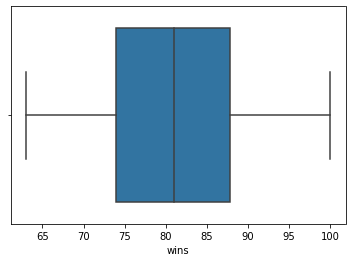

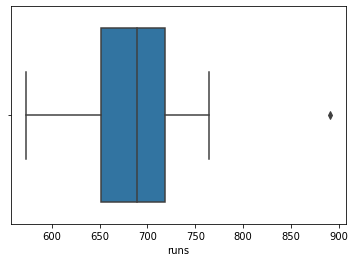

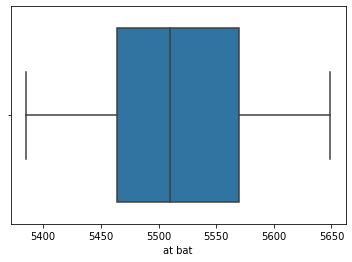

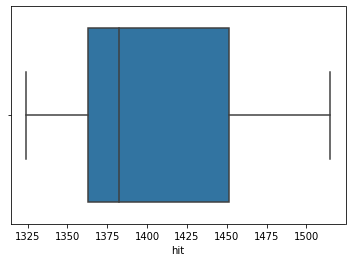

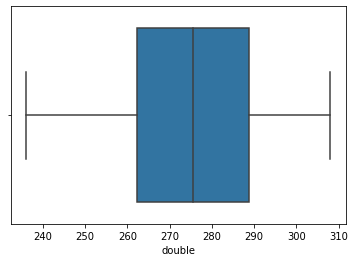

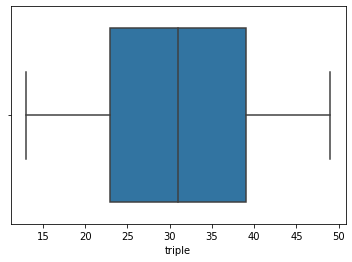

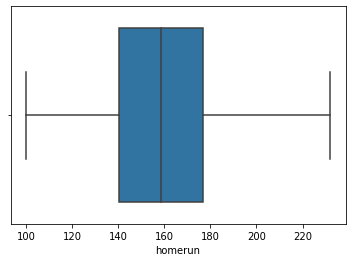

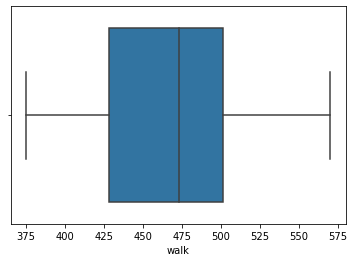

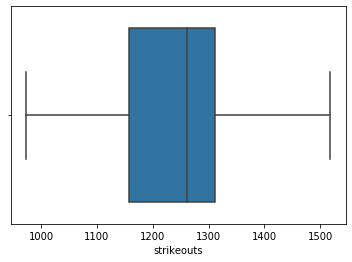

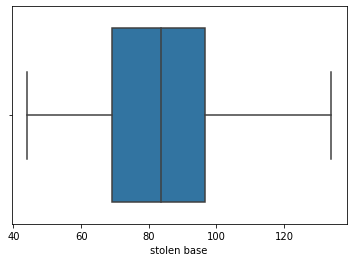

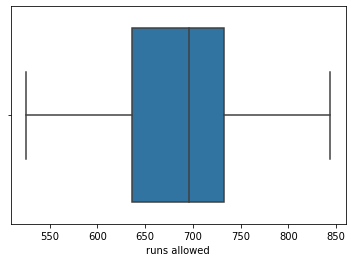

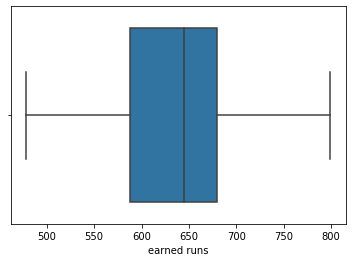

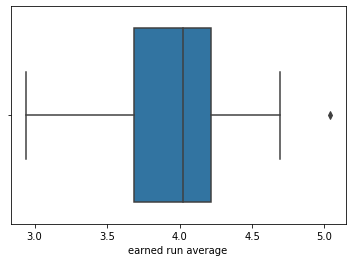

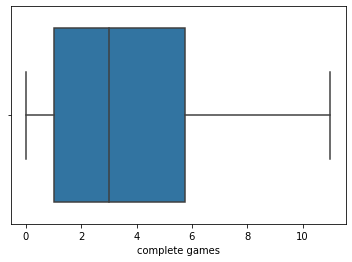

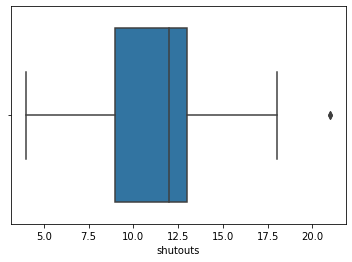

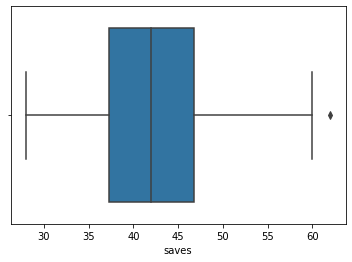

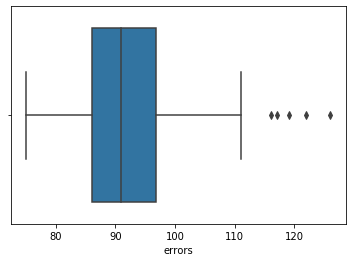

In [18]:
for i in num_feat:
    plt.figure()
    sns.boxplot(x=df[i])

#### removing the outliers

In [65]:
df1 = df
for i in num_feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]
df1.shape

(20, 17)

Since we are losing the 30% of the data while removing the outliers, therefore we are losng a lot of information from our data. So it is not good to remove that amount of data.

#### splitting the features and the targets

In [193]:
X = df.drop("wins", axis = 1)
y = df["wins"]

### scaling

Since, all the columns have different scale. So scaling is required for the models to converge efficiently.

In [194]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### spliting the test and train data

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Machine learning modeling

### Linear regression model

In [196]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
LR.score(X_test, y_test)

0.8131128856407601

In [198]:
cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)

array([-0.20016784, -0.86590069,  0.16972805, -2.08776935, -0.49155507])

There are so much fluctuations in the accuracy of the linear regression model. We can try some other regression models.

### Decision tree regressor

In [199]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [200]:
DT_score = DT.score(X_test, y_test)
DT_score

0.09553641346906805

In [201]:
cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)

array([ 0.14794455,  0.19079628, -0.68292683, -0.93657635, -0.60586618])

Again, the accuracy of the decision tree model is fluctuating with a large range.

### Random forest regressor

In [202]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 100)

RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.61125931871574

In [203]:
cross_val_score(RF, X_train, y_train, scoring = "r2", cv = 5)

array([ 0.29240416,  0.40797208, -0.69474268,  0.26963116,  0.17162383])

### Gradient Boost regressor

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators = 80)

GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.5264879621347496

In [205]:
cross_val_score(GB, X_train, y_train, scoring = "r2", cv = 5)

array([ 0.45226377,  0.45094958, -0.84474911,  0.03349303, -0.26623995])

In [206]:
param_dict = {
    "n_estimators":range(50,100, 10),
    "max_depth":range(1,10),
    "min_samples_split":range(2,8),
    "min_samples_leaf":range(1,5)
}
grid_RF = GridSearchCV(RF,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  7.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [207]:
grid_RF.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [208]:
grid_RF.score(X_test, y_test)

0.6276659609803157

In [211]:
RF_final = RandomForestRegressor(n_estimators = 50, max_depth = 7, min_samples_leaf = 4, min_samples_split = 2)
RF_final.fit(X_train, y_train)
accuracy = RF_final.score(X_test, y_test)
accuracy

0.5205510487274541

In [212]:
cross_val_score(RF_final, X_train, y_train, scoring = "r2", cv = 5)

array([ 0.32597163,  0.36627131, -0.5327638 ,  0.51779443,  0.30368034])

### Applying PCA to data and then using random forest

In [214]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [221]:
X_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)

In [224]:
#RF_pca = RandomForestRegressor(n_estimators = 50, max_depth = 7, min_samples_leaf = 4, min_samples_split = 2)
RF_pca = RandomForestRegressor()
RF_pca.fit(X_train, y_train)
RF_pca.score(X_test, y_test)

0.739834016973126

In [225]:
cross_val_score(RF_pca, X_train, y_train, scoring = "r2", cv = 5)

array([ 0.40992225, -0.91358505, -0.01964436,  0.34970125, -1.06612222])

### Conclusion

Since the dataset is very small and has 30 instances only. After splitng the test and train dataset with 80-20 ratio, the training data has only 24 instances. It is very hard for any model to provide significant accuracy for such a small data. We have tried different models but none of them has given significantly better performance. We need more data to train the model with some better accuracy.